In [1]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import os

# Tell python where field paths etc are relative to
script_dir = os.path.abspath('')
fault_dir = "../../../data/shaw/rundir5091"
catalogue_dir = fault_dir



Read in fault model and catalogue.
Bruce's fault files are quite large and can be downloaded from https://github.com/uc-eqgeo/rnc2-data/tree/main/bruce/faults

In [2]:
fault_model = RsqSimMultiFault.read_fault_file_bruce(os.path.join(script_dir, fault_dir, "zfault_Deepen.in"),
                                                     os.path.join(script_dir, fault_dir, "znames_Deepen.in"),
                                                     transform_from_utm=True)
whole_catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(os.path.join(catalogue_dir, "eqs..out"),
                                                                list_file_directory=catalogue_dir, list_file_prefix="")

Event of interest (note that we have only selected faults that rupture with >50 patches in this event).

Note also that `events_by_number` returns a list, and we take the first element from it.

In [3]:
event = whole_catalogue.events_by_number(1837093, fault_model, min_patches=50)[0]

Plot

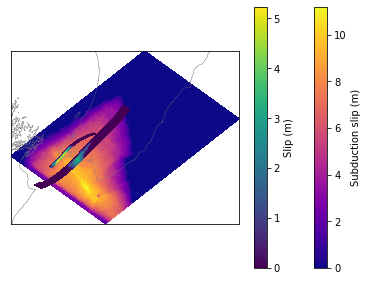

In [4]:
_ = event.plot_slip_2d(write="ev1837093.png")